In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [45]:
# generate random data for classification
r = 2          # radius
c1, c2 = 0, 0  # coordinates of the center

n0 = 40  # number of samples generated for class negative
n1 = 40  # number of samples generated for class positive
y = np.zeros(n0)
y = np.append(y, np.ones(n1))

x1, x2 = [], [] # initialize x

for i in range(n0):
    a = 2 * math.pi * random.random()   # random angular position
    d = r * math.sqrt(random.random())  # random distance from the center
    x1p = c1 + (d + np.random.randn()) * math.cos(a)
    x2p = c2 + (d + np.random.randn()) * math.sin(a)
    x1.append(x1p)
    x2.append(x2p)

for i in range(n1):
    a = 2 * math.pi * random.random()    # random angular position
    d = 2*r * math.sqrt(random.random()) # random distance from the center
    x1p = c1  + (d + r) * math.cos(a)
    x2p = c2  + (d + r) * math.sin(a)
    x1.append(x1p)
    x2.append(x2p)

x1 = np.reshape(x1,(-1,1))
x2 = np.reshape(x2,(-1,1))

x = np.concatenate((x1,x2),axis=1)
y = np.reshape(y,(-1,1))

mydata = np.concatenate((x,y), axis=1)

In [46]:
# convert an array to dataframe
df = pd.DataFrame(mydata, columns=['feature 1', 'feature 2', 'result'])
df

,feature 1,feature 2,result
0,-2.134346,-0.725003,0.0
1,-0.575702,0.477756,0.0
2,3.658566,0.018386,0.0
3,0.841476,-1.093855,0.0
4,0.604345,-0.444258,0.0
...,...,...,...
75,-4.028272,3.747731,1.0
76,0.237394,-4.320108,1.0
77,4.037270,1.110944,1.0
78,1.165234,-5.557946,1.0


In [47]:
# get positive and negative samples for plotting
neg = df['result'] == 0
pos = df['result'] == 1

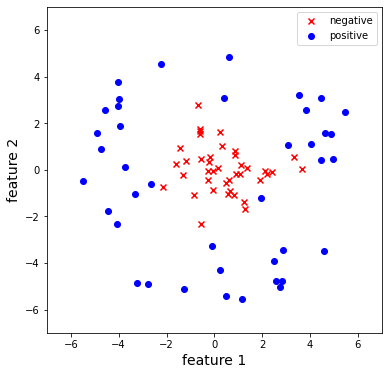

In [48]:
# visualize Data
plt.figure(figsize=(6,6))

plt.scatter(df.loc[neg, 'feature 1'], df.loc[neg, 'feature 2'], color='r', marker='x', label='negative')
plt.scatter(df.loc[pos, 'feature 1'], df.loc[pos, 'feature 2'], color='b', marker='o', label='positive')
plt.xlabel('feature 1', size=14)
plt.ylabel('feature 2', size=14)
plt.legend()
plt.xlim((-7,7))
plt.ylim((-7,7))
plt.show()

In [49]:
# define function to map higher order polynomial features
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res

In [50]:
X = df.iloc[:, :2] # Get the features 
y = df.iloc[:, 2]  # Get the target variable

# loc is label-based, which means that you have to specify rows and columns based on
# their row and column labels. iloc is integer position-based, so you have to specify
# rows and columns by their integer position values.

In [60]:
degree = 6
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)

In [61]:
# define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [62]:
# define the Cost function for Logistic Regression
def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    f = sigmoid(z)
    term1 = y * np.log(f)
    term2 = (1- y) * np.log(1 - f)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 

In [63]:
# set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

In [64]:
# call the optimization routine to minimize the cost function
# note: This automatically picks the learning rate
from scipy.optimize import minimize

res = minimize(costFunc, initial_theta, args=(X_poly, y))

<ipython-input-62-935a804db83d>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)
C:\Users\mr0708137\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-62-935a804db83d>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)
<ipython-input-62-935a804db83d>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)


In [65]:
# our optimizated coefficients
theta = res.x
print(theta)

[-2.11996836e+02  3.50260026e+00  3.42756491e+00 -7.26695844e+01
 -7.21665471e-01 -8.28896831e+01 -1.04228191e+01 -3.89471054e+01
  5.67044102e+01  9.97526045e+00  1.38879157e+01 -1.03433129e+01
  6.70372285e+01  2.63039830e+01  1.25932942e+01  4.79524081e-03
  2.43160113e+00  1.67797320e+00 -1.32243196e+00 -4.90048265e+00
 -8.17638247e-01 -3.99830473e-01  7.77597696e-01 -2.33093560e+00
 -1.82941641e+00 -2.58911936e+00 -6.83607161e-01 -2.64295720e-01]


In [66]:
# define a function to plot the decision boundary
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-6, 6, 50)
    v = np.linspace(-6, 6, 50)
    U,V = np.meshgrid(u,v)
    
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    
#     Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U, V, Z, levels=[0], cmap= "Greys_r")
    axes.legend(labels=['positive', 'negative', 'Decision Boundary'])
    return cs

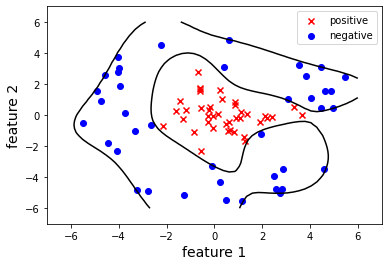

In [67]:
# plot decision boundary
fig, axes = plt.subplots()

axes.scatter(df.loc[neg, 'feature 1'], df.loc[neg, 'feature 2'], color='r', marker='x', label='negative')
axes.scatter(df.loc[pos, 'feature 1'], df.loc[pos, 'feature 2'], color='b', marker='o', label='positive')
plt.xlabel('feature 1', size=14)
plt.ylabel('feature 2', size=14)
plt.legend()
plt.xlim((-7,7))
plt.ylim((-7,7))

plotDecisionBoundary(theta, degree, axes)

plt.show()

You could also use `PolynomialFeatures` method from sklearn to generate polynomial and interaction features. then, use `LogisticRegression` method from sklearn to build the model.

[-6.34383189e-01 -4.94310188e-02  1.78609681e-02 -3.55770150e-01
  3.56803570e-02 -3.16486614e-01  5.65117321e-02 -6.85745030e-03
  1.76573438e-03  6.54878259e-03 -3.66986914e-01 -4.70156349e-02
 -1.05597918e-01  7.14061301e-02 -4.21500369e-01 -4.28600206e-02
 -1.08011956e-01  2.03695353e-01  5.60224378e-02 -7.15182287e-04
  3.76117780e-03  3.91508395e-02  4.79575187e-04  2.94696616e-01
 -8.30645018e-02 -8.14857649e-02  5.51408612e-02  4.77907616e-02]


C:\Users\mr0708137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mr0708137\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


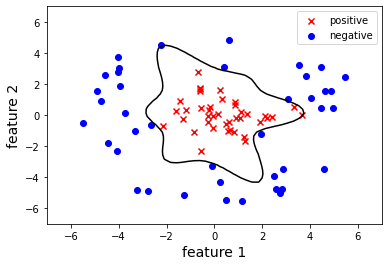

In [98]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit_transform(X_poly)
# y = np.array(y).reshape(-1,1)
# sc.fit_transform(y)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', C=10).fit(X_poly, y)

theta = np.ravel(np.concatenate((logreg.intercept_.reshape(-1,1), logreg.coef_), axis = 1))
print(theta)

fig, axes = plt.subplots()

axes.scatter(df.loc[neg, 'feature 1'], df.loc[neg, 'feature 2'], color='r', marker='x', label='negative')
axes.scatter(df.loc[pos, 'feature 1'], df.loc[pos, 'feature 2'], color='b', marker='o', label='positive')
plt.xlabel('feature 1', size=14)
plt.ylabel('feature 2', size=14)
plt.legend()
plt.xlim((-7,7))
plt.ylim((-7,7))

plotDecisionBoundary(theta, degree, axes)

plt.show()

As expected this is underfitting the data. The model in this case is said to be high bias and low variance. That is the model is biased towards assuming the data in linearly seperable while the fact is that its not.

Now Lets try the model by giving a higher degree for the polynomial features

In [52]:
degree = 6
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

res = minimize(costFunc, initial_theta, args=(X_poly, y))

theta = res.x
print(theta)

<ipython-input-46-935a804db83d>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)
C:\Users\mr0708137\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-46-935a804db83d>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)
<ipython-input-46-935a804db83d>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)
<ipython-input-45-ce65b309352b>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-46-935a804db83d>:6: RuntimeWarning: divide by zero encountered in log
  term1 = y * np.log(f)


[-336.0916002     8.08797798    0.60904439 -160.44266785    6.05884971
  -22.7249305     7.13056585   73.26796659    8.97592665  -62.18502705
   31.79402845  -70.45873992   77.40013616   86.44078456  -14.12977114
   -1.53953753   -3.59622538    6.62132333   -2.70148354   -5.01874866
    3.25746423   -0.89020539    4.16267375   -2.91683987   -4.99890118
   -0.467976     -2.34534337    0.81287238]


<ipython-input-45-ce65b309352b>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-46-935a804db83d>:6: RuntimeWarning: divide by zero encountered in log
  term1 = y * np.log(f)
<ipython-input-46-935a804db83d>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)


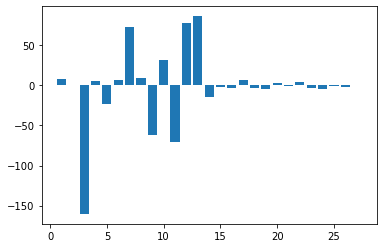

In [53]:
m = np.shape(theta)

plt.bar(range(1,len(theta)),theta[1:])
plt.show()

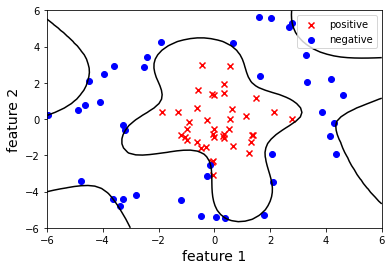

In [54]:
# Plot Decision boundary
fig, axes = plt.subplots()

axes.scatter(df.loc[neg, 'feature 1'], df.loc[neg, 'feature 2'], color='r', marker='x', label='negative')
axes.scatter(df.loc[pos, 'feature 1'], df.loc[pos, 'feature 2'], color='b', marker='o', label='positive')
plt.xlabel('feature 1', size=14)
plt.ylabel('feature 2', size=14)
plt.legend()
# plt.xlim((-7,7))
# plt.ylim((-7,7))

plotDecisionBoundary(theta, degree, axes)

plt.show()

As we can see if we set degree to be 6, the model tries hard to capture every single example perfectly and overfits the data. This kind of model is said to have low bias and high variance. That is the model has not pre-conceived notion about the seperation of the positive and negative examples and pretty much can fit any kind of data. Such model will fail in predicting the correct classification when it sees new examples.

One of techiques is to use regularization. The idea is to penalize the algorithm when it tries to overfit by adding a regularization term to the cost function. The New Cost function with the regularization has a new term added to the old cost function: $\frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$, where $\lambda$ is the regularization factor and $n$ is the number of features.

In [55]:
# define the regularized cost function
def costFuncReg(theta, X, y, reg_factor):
    m = y.shape[0]
    z = X.dot(theta)
    f = sigmoid(z)
    term1 = y * np.log(f)
    term2 = (1- y) * np.log(1 - f)
    J = -np.sum(term1 + term2, axis = 0) / m
    
    # regularization Term
    reg_term = reg_factor/(2 * m) * sum(theta[1:] ** 2)
    
    J = J + reg_term
    return J  

In [56]:
reg_factor = 1
degree = 6
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

res = minimize(costFuncReg, initial_theta, args=(X_poly, y, reg_factor))

theta = res.x
print(theta)

<ipython-input-55-42b5744c5746>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)
C:\Users\mr0708137\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-55-42b5744c5746>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)
<ipython-input-55-42b5744c5746>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)


[-7.29812966e+00  2.89501324e-02 -1.45608668e-01 -6.08648453e-02
  2.53886821e-02  2.77526656e-01  3.23072424e-02  4.51118622e-02
 -1.09586423e-01 -6.48784560e-01 -5.98046489e-02 -3.72604900e-02
 -2.86352281e-02  4.66039525e-01 -2.69672155e-01 -2.97321614e-02
  2.81223034e-02  7.59363806e-02 -9.15854737e-02 -4.62185216e-01
  4.25484904e-02  1.64779679e-02 -4.68167086e-03 -8.16785493e-03
 -4.69278062e-02  4.76328952e-01  2.23509623e-02  1.91639549e-02]


<ipython-input-55-42b5744c5746>:7: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - f)


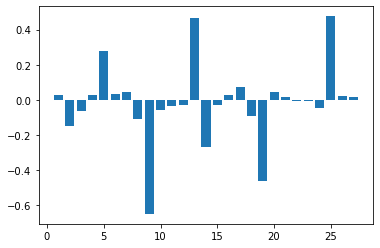

In [57]:
m = np.shape(theta)

plt.bar(range(1,len(theta)),theta[1:])
plt.show()

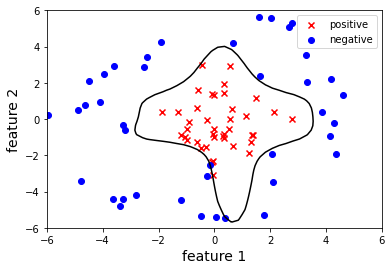

In [58]:
# Plot Decision boundary
fig, axes = plt.subplots()

axes.scatter(df.loc[neg, 'feature 1'], df.loc[neg, 'feature 2'], color='r', marker='x', label='negative')
axes.scatter(df.loc[pos, 'feature 1'], df.loc[pos, 'feature 2'], color='b', marker='o', label='positive')
plt.xlabel('feature 1', size=14)
plt.ylabel('feature 2', size=14)
plt.legend()
# plt.xlim((-7,7))
# plt.ylim((-7,7))

plotDecisionBoundary(theta, degree, axes)

plt.show()

As we see that the regularization prevented the degree = 6 overfitted model. However, its also good to see the negative effects of too much regularization on our model. As we can see if you change the degree to 2, having too much regularization negatively affects the model, since it now high bias towards a certain combinations of `'feature1'` and `'feature2'`.

In [2]:
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1)#, random_state=1)

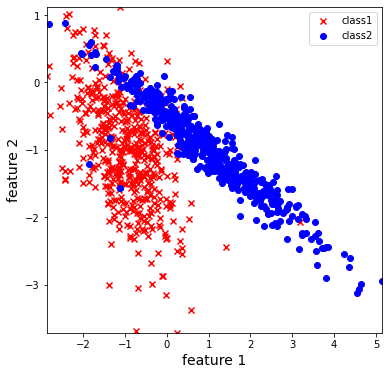

In [6]:
class1 = y == 0
class2 = y == 1

plt.figure(figsize=(6,6))

plt.scatter(X[class1, 0], X[class1, 1], color='r', marker='x', label='class1')
plt.scatter(X[class2, 0], X[class2, 1], color='b', marker='o', label='class2')

plt.xlabel('feature 1', size=14)
plt.ylabel('feature 2', size=14)
plt.legend()

plt.xlim((np.min(X[:,0]),np.max(X[:,0])))
plt.ylim((np.min(X[:,1]),np.max(X[:,1])))


plt.show()

In [11]:
y = np.reshape(y,(-1,1))
print(np.shape(X))
print(np.shape(y))
mydata = np.concatenate((X,y), axis=1)
df = pd.DataFrame(mydata, columns=['feature 1', 'feature 2', 'result'])
df

(1000, 2)
(1000, 1)


,feature 1,feature 2,result
0,-2.125982,-0.240697,0.0
1,1.749024,-1.214761,1.0
2,-1.478128,-1.161146,0.0
3,-1.196342,-0.312380,0.0
4,0.277409,-0.624031,1.0
...,...,...,...
995,0.847693,-1.060918,1.0
996,-0.941260,-2.117371,0.0
997,-0.047597,-0.424955,1.0
998,-1.700482,-0.698691,0.0
